In [91]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crimes_own_parcel/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crimes_own_parcel/tables"

# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='any_crime_200m'

In [92]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [93]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                        Any Crime Incidents Within 200m, Dec. 2022   
                                                 \emph{Independent Variable}                                                         
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_200m                                      0.000000e+00   
                                                 pre_treatment_change_in_any_crime_200m                               2.016382e-04   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                   1.670392e-03   
                                                 job_density_2013                                                     1.052225e-81   
                                                 med_hhinc2016                                                        4.753811e-04   
                                                 poor_share2010                                                       2.247478e-23   
                                                 popdensity2010                                                       7.047533e-19   
                                                 rent_twobed2015                                                      5.101649e-24   
                                                 share_white2010                                                      1.266486e-01   
                                                 traveltime15_2010                                                    2.184123e-35   
Panel C: Case Initiation                         for_cause                                                            9.385131e-01   
                                                 no_cause                                                             1.041353e-03   
                                                 non_payment                                                          7.608165e-02   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                             7.968389e-01   
                                                 hasAttyP                                                             2.770767e-03   
                                                 isEntityD                                                            4.579233e-02   
                                                 isEntityP                                                            4.458389e-10   

                                                                                                           
                                                                                        Plaintiff Victory  
                                                 \emph{Independent Variable}                               
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_200m             7.204505e-01  
                                                 pre_treatment_change_in_any_crime_200m      6.844441e-02  
Panel B: Census Tract Characteristics            frac_coll_plus2010                          2.403331e-01  
                                                 job_density_2013                            1.626836e-01  
                                                 med_hhinc2016                               1.910501e-01  
                                                 poor_share2010                              1.428679e-01  
                                                 popdensity2010                              5.946111e-02  
                                                 rent_twobed2015                             5.003043e-01  
                                                 share_white2010                             9.829904e-02  
                                                 traveltime15_2010                           2.271578e-01  
Panel C: Case Initiation   

In [94]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                Cases Won by Plaintiff   
Panel A twenty_seventeen_any_crime_200m                      18.172613   
        pre_treatment_change_in_any_crime_200m                0.154250   
Panel B Share with bachelor's degree                          0.322882   
        Jobs per square mile (2010)                       16069.137185   
        Median household income (2016)                    48035.651626   
        Share below poverty line                              0.273292   
        Population density (2010)                         23086.043553   
        Median two bedroom rent (2015)                     1339.985876   
        Share with commute $<$15 minutes (2010)               0.162315   
Panel C No cause                                              0.047744   
Panel D Plaintiff has an attorney                             0.879853   
        Defendant is an entity                                0.014166   
        Plaintiff is an entity                                0.808499   

                                                Difference in Cases Won by Defendant  \
                                                                          Unweighted   
Panel A twenty_seventeen_any_crime_200m                                     0.308535   
        pre_treatment_change_in_any_crime_200m                              0.841143   
Panel B Share with bachelor's degree                                        0.014179   
        Jobs per square mile (2010)                                      3197.929971   
        Median household income (2016)                                   1777.651626   
        Share below poverty line                                            0.011240   
        Population density (2010)                                        1373.148087   
        Median two bedroom rent (2015)                                    -29.551242   
        Share with commute $<$15 minutes (2010)                             0.005986   
Panel C No cause                                                           -0.051771   
Panel D Plaintiff has an attorney                                           0.071601   
        Defendant is an entity                                             -0.039232   
        Plaintiff is an entity                                              0.099762   

                                                                             \
                                                     \emph{p}      Weighted   
Panel A twenty_seventeen_any_crime_200m          7.204505e-01      0.564800   
        pre_treatment_change_in_any_crime_200m   6.844441e-02      0.316091   
Panel B Share with bachelor's degree             2.403331e-01      0.071444   
        Jobs per square mile (2010)              1.626836e-01  12528.388890   
        Median household income (2016)           1.910501e-01   3418.210740   
        Share below poverty line                 1.428679e-01      0.002420   
        Population density (2010)                5.946111e-02    518.251701   
        Median two bedroom rent (2015)           5.003043e-01    176.547037   
        Share with commute $<$15 minutes (2010)  2.271578e-01      0.023577   
Panel C No cause                                 3.835665e-05     -0.112103   
Panel D Plaintiff has an attorney                1.016046e-04      0.204126   
        Defendant is an entity                   4.881644e-07      0.013878   
        Plaintiff is an entity                   6.134468e-06      0.230379   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_any_crime_200m          7.274535e-01  
        pre_treatment_change_in_any_crime_200m   7.250347e-01  
Panel B Share with bachelor's degree             1.173373e-03  
        Jobs per square mile (2010)              3.912359e-03  
        Median household income (2016)           1.848530e-01  
      

In [95]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [96]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:12<00:00, 168.93it/s]


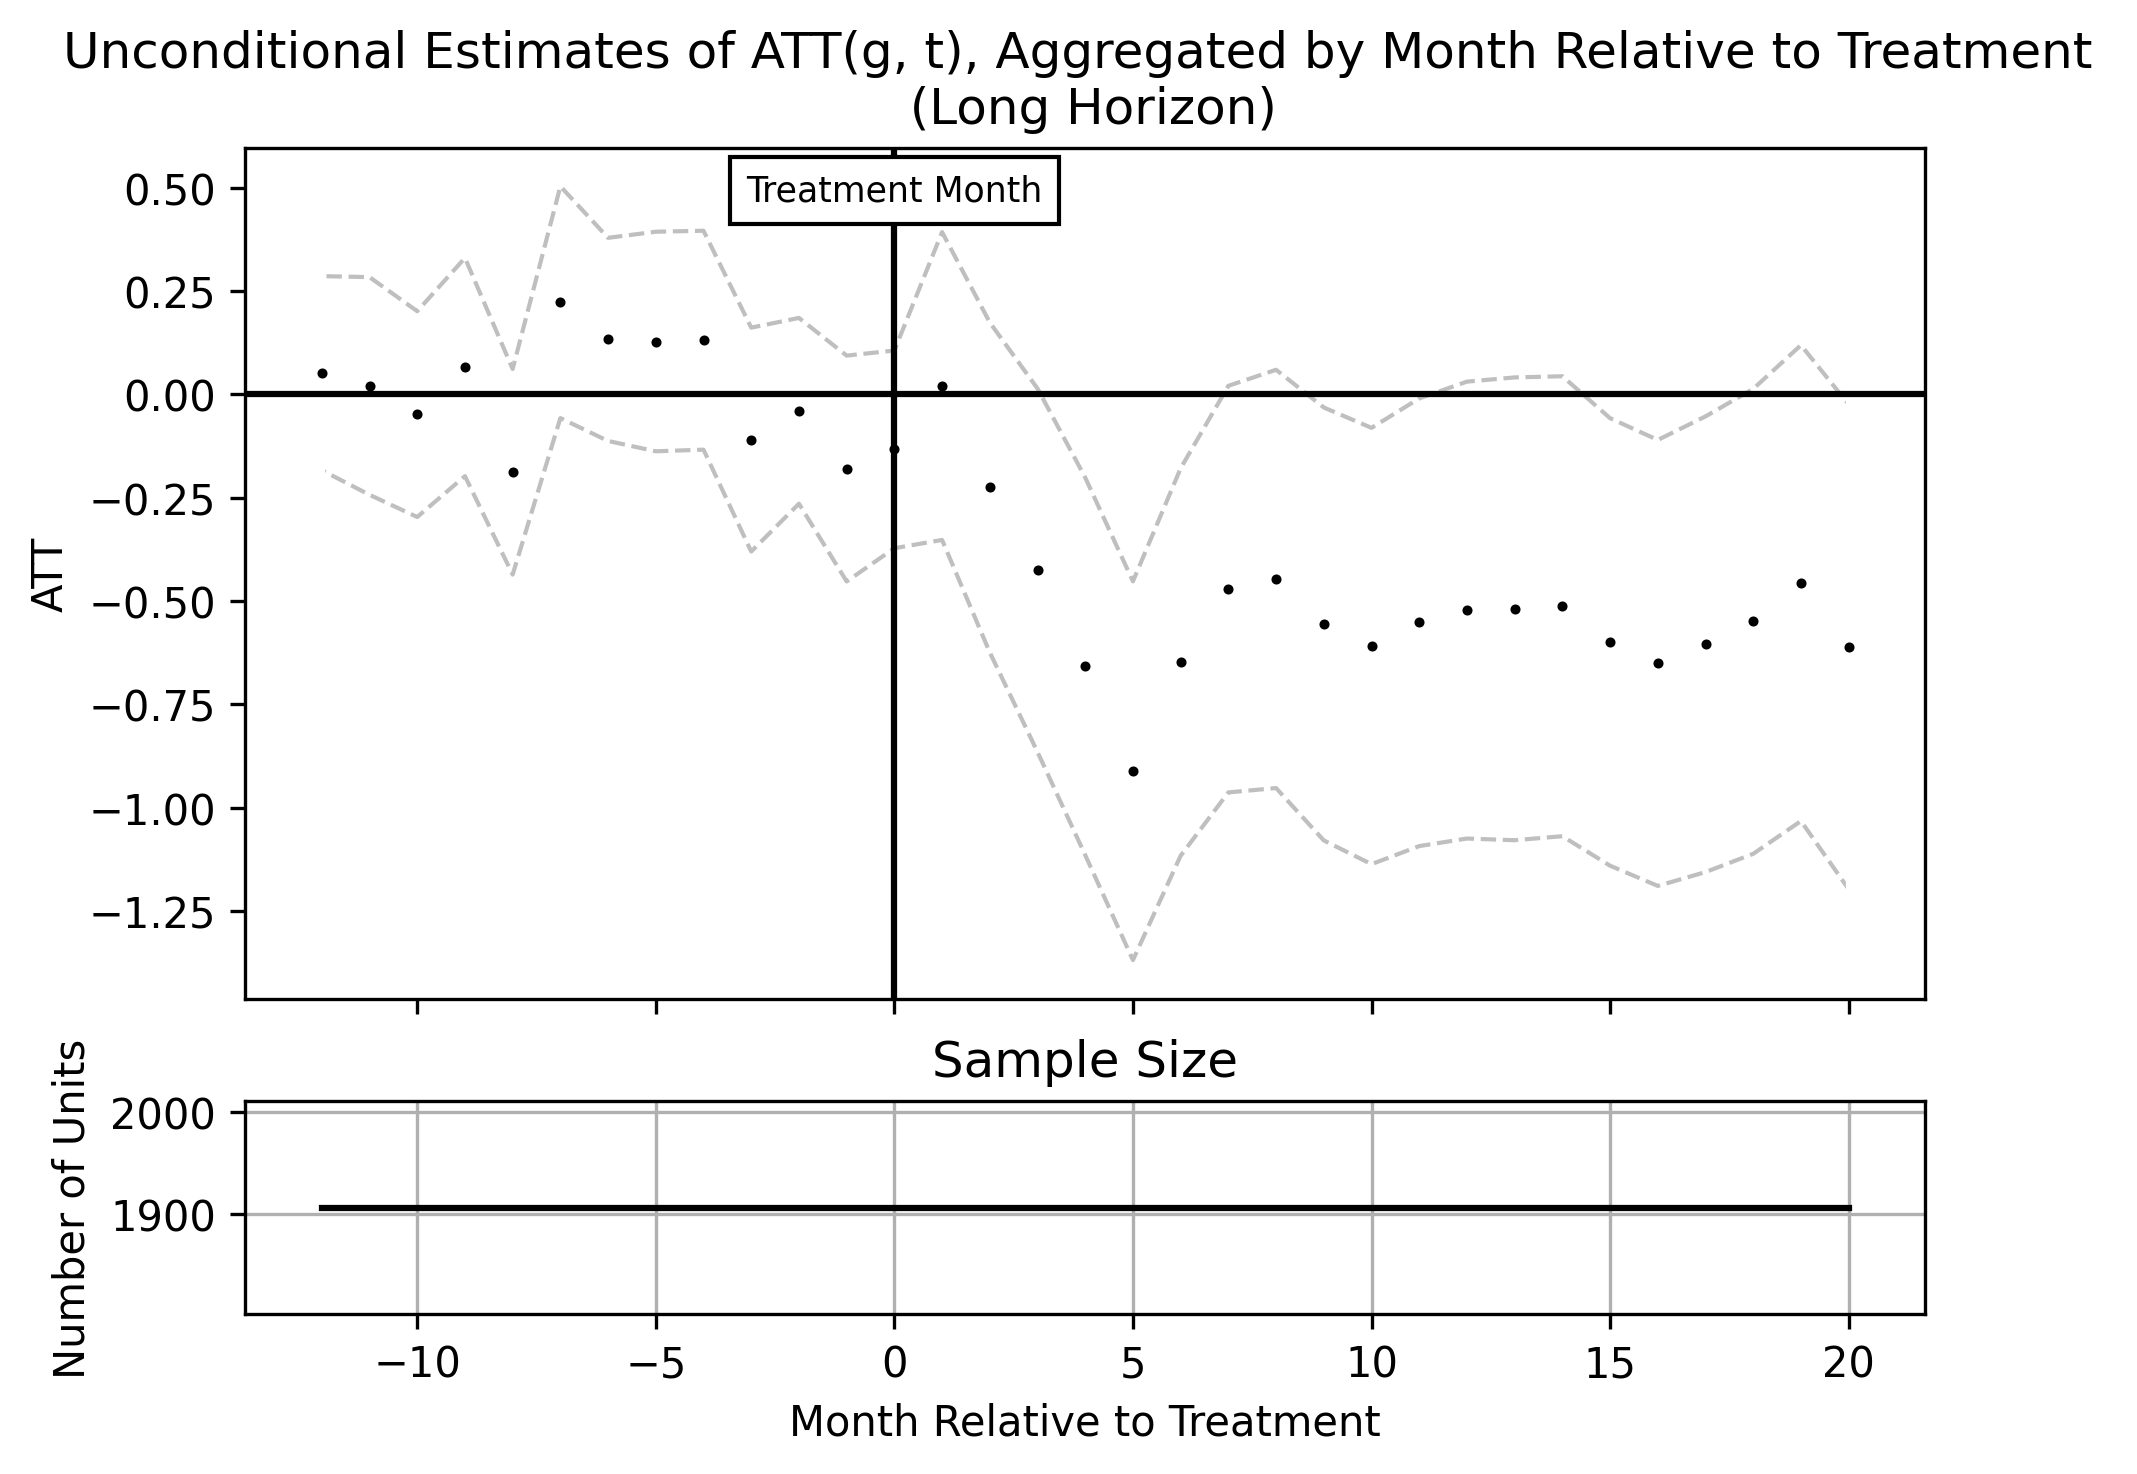

In [97]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

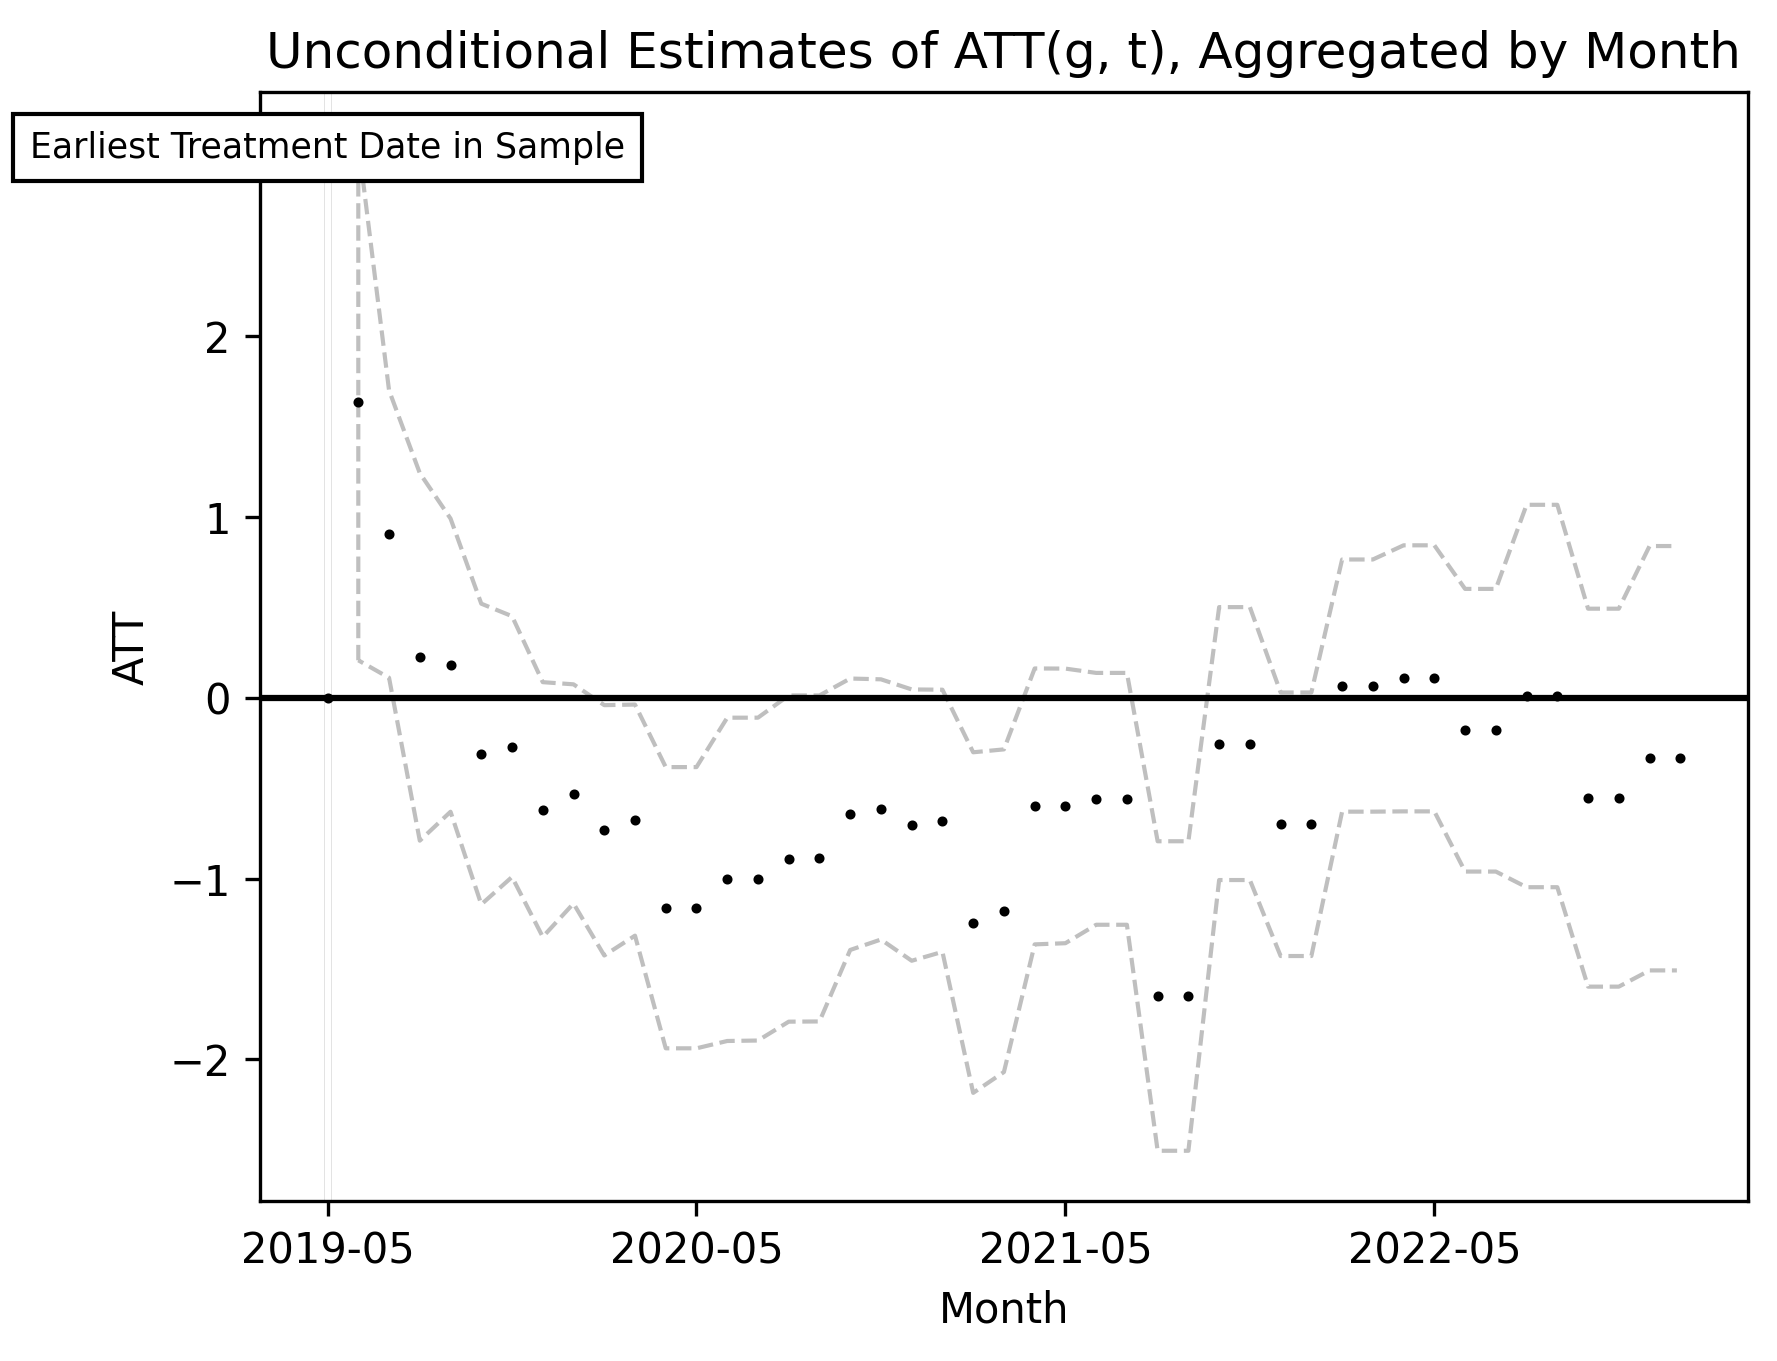

In [98]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [99]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   54%|██████████▊         | 1180/2184 [00:32<00:21, 47.23it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:33: RuntimeWarning: invalid value encountered in scalar divide
  eta_cont = np.mean(dr_att_cont) / np.mean(w_cont)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.

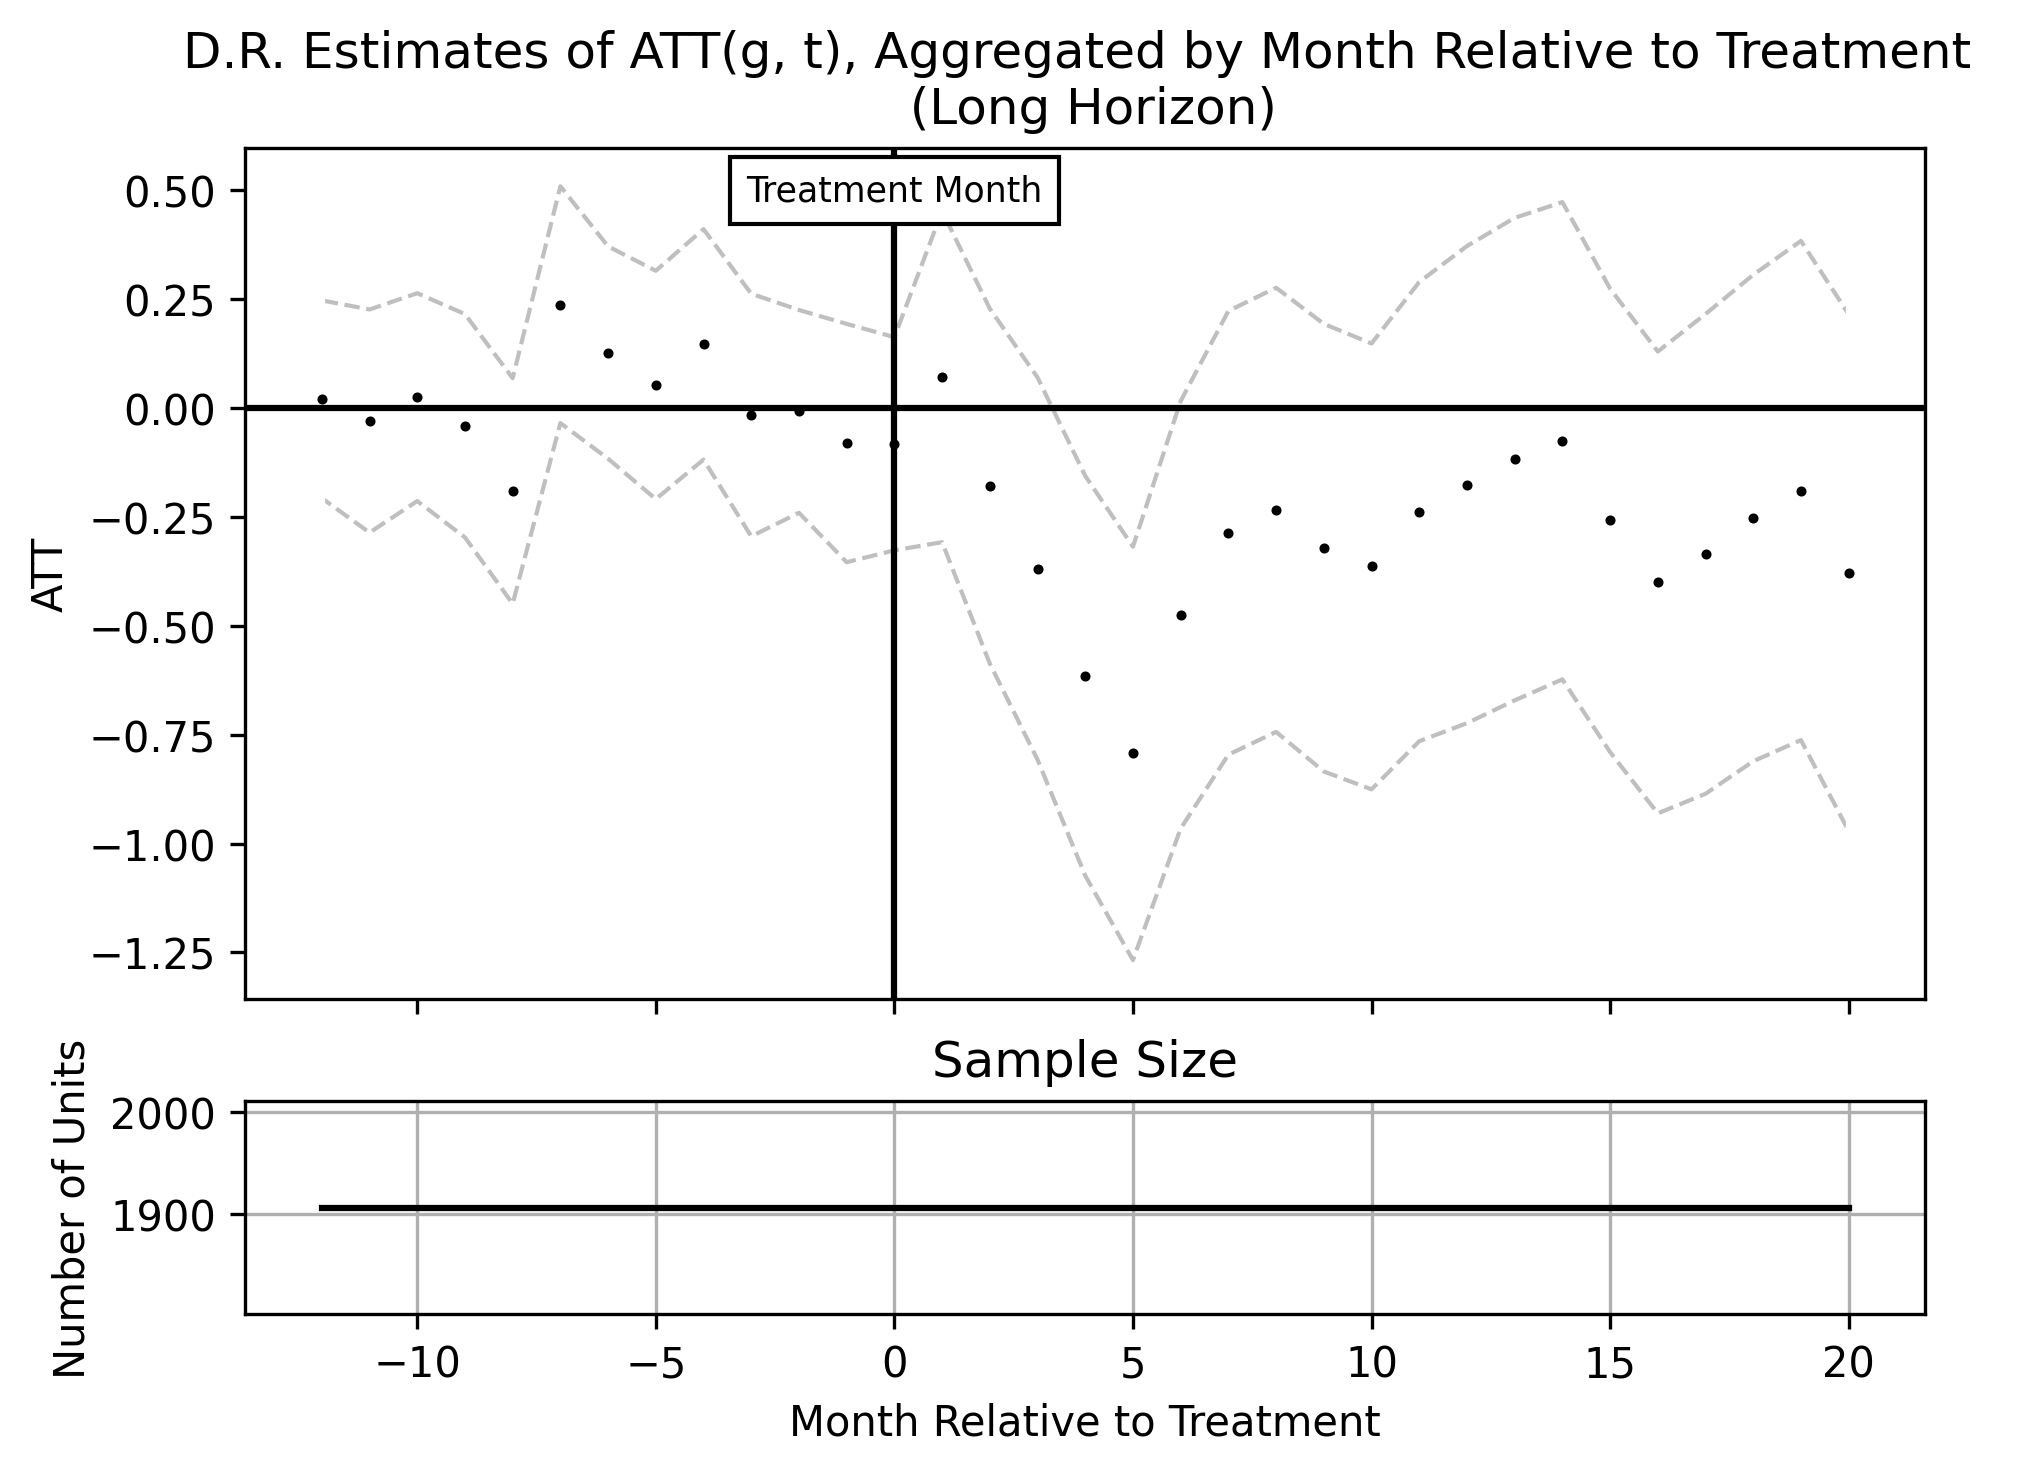

In [100]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

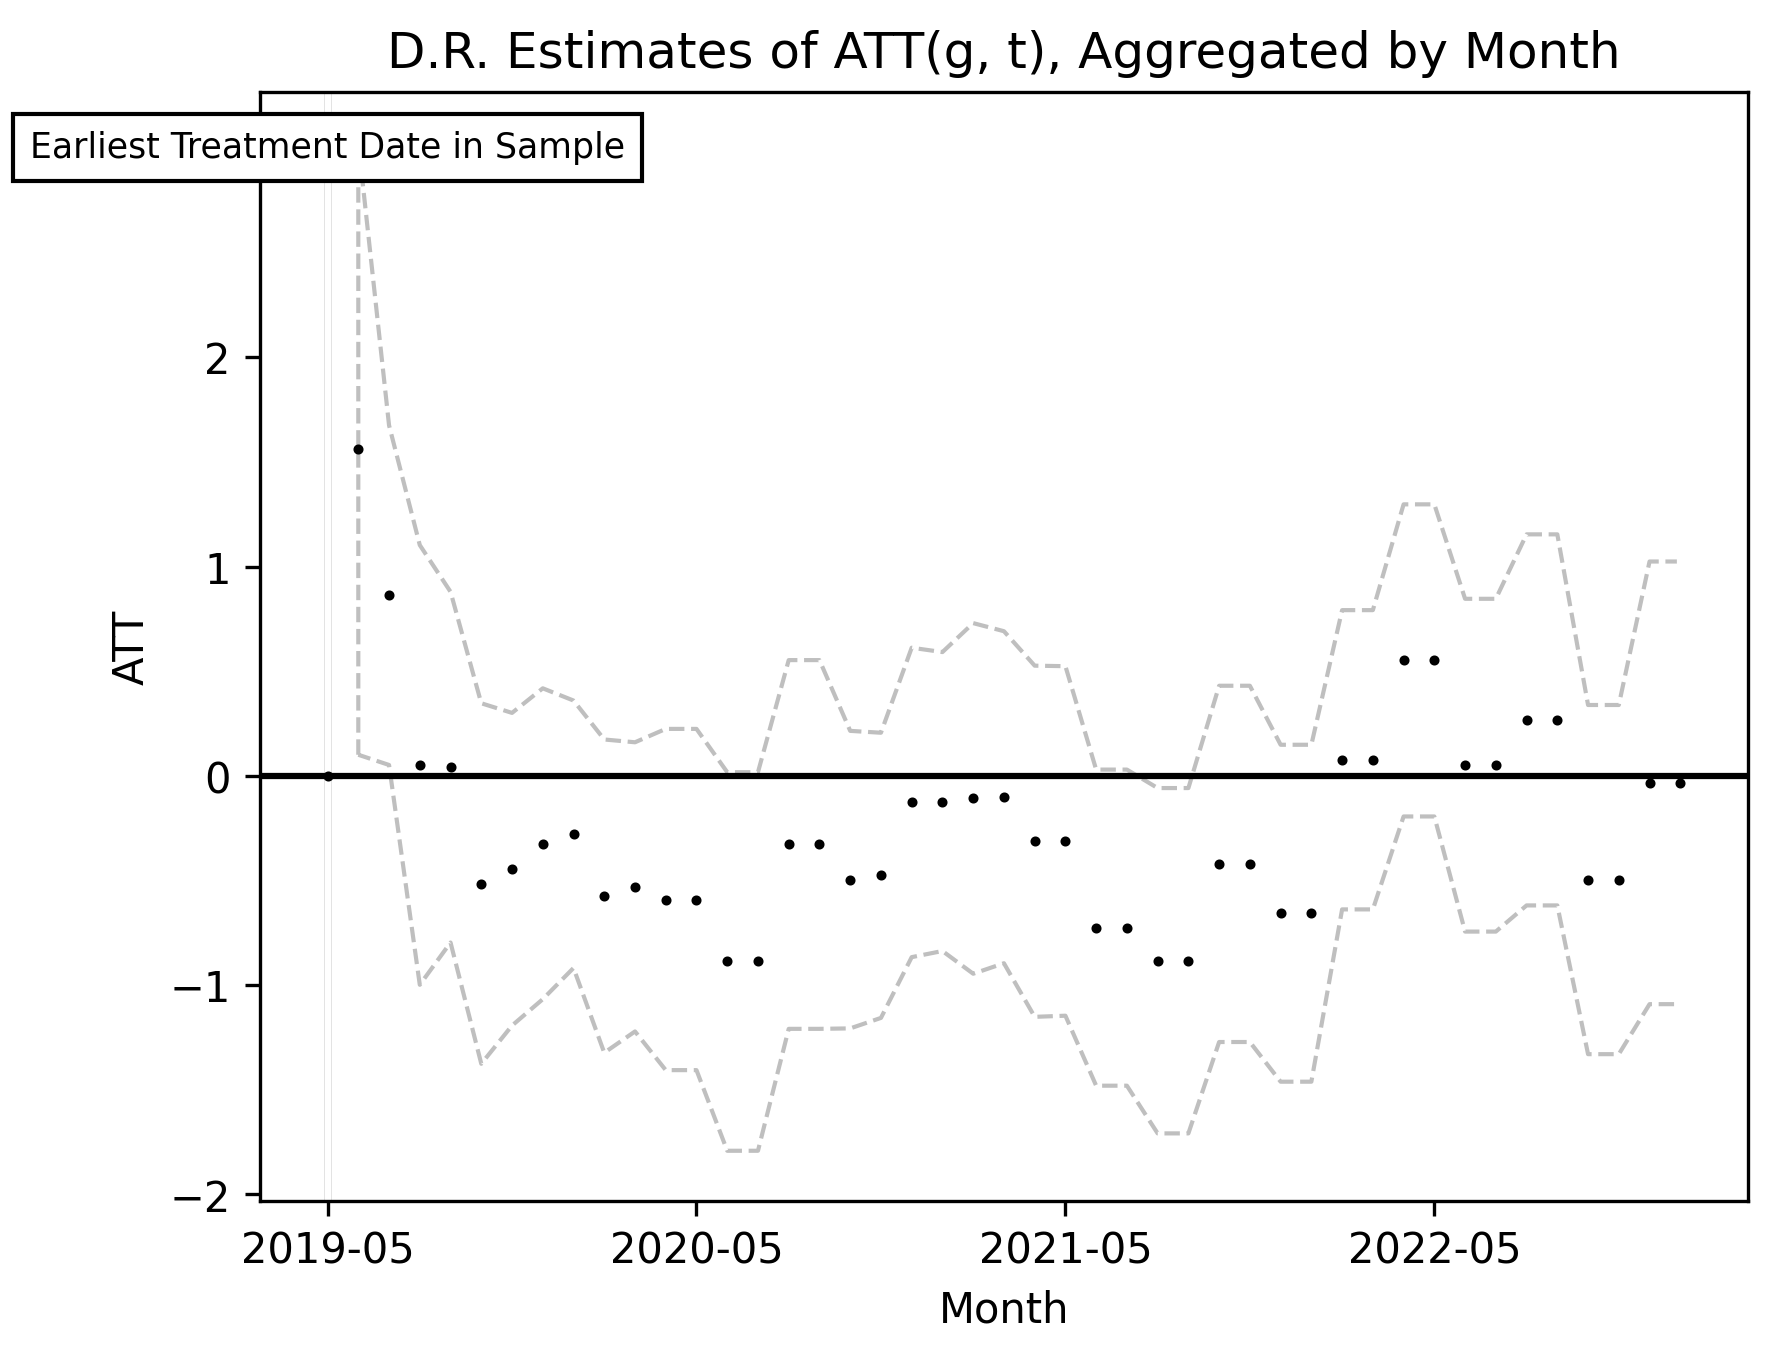

In [101]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")